In [99]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [51]:
### author: Josimar Edinson Chire Saire
### NUSP: 10569111
### Curso: SCC5830
### 2019/I
### K-Means

import imageio as igio
import matplotlib.pyplot as plt
import numpy as np
import random

In [118]:
# a) Filename for the input image I;
# b) Filename for the reference image R;
# c) Option for pixel attributes:
# 1 - R,G,B
# 2 - R,G,B,x,y
# 3 - luminance
# 4 - luminance,x,y
# d) Number of clusters k:
# e) Number of iterations: n
# f) Seed S to be used for the random centroids choice.
# 2. Generate an output image ( ˆI) according to the option for feature extraction.

def dist(c, x):
    acum = 0
    for i in range(0,len(c)):
        acum += (c[i] - x[i]) * (c[i] - x[i])
    return np.sqrt(acum)

def my_min(x):
    m_min = np.power(2,15)
    idx = -1
    for i in range(0,x.shape[1]):
        if( x[0,i] < m_min ):
            m_min = x[0,i]
            idx = i
    return [m_min, idx]

def my_mse( A, B):
#     if( A.shape != B.shape):
#         print('Both matrixes are of same dimensions\n')
    counter = 0
    for i in range(0,A.shape[0]):
        for j in range(0,A.shape[1]):
            counter += (A[i,j]- B[i,j])*(A[i,j]- B[i,j])
    print( np.sqrt(counter)/(A.shape[0]*A.shape[1]) )

def function( filename_inp, filename_ref, pixel_att, n_clusters, n_iter, seed ):
    
    img_inp = igio.imread(filename_inp)
    
    img_shape = img_inp.shape
    print(img_shape)
    m_dist = np.zeros([ img_shape[0], img_shape[1] ])
    
    if( pixel_att == 1 ):
        centroids = np.zeros([n_clusters, 3])
        random.seed( seed )

        ##Initialization of centroids
        for c in range(0, n_clusters):
            centroids[c][0] = img_inp[int(random.randint(0,img_shape[0]-1)), int(random.randint(0,img_shape[1]-1)), 0 ] 
            centroids[c][1] = img_inp[int(random.randint(0,img_shape[0]-1)), int(random.randint(0,img_shape[1]-1)), 1 ] 
            centroids[c][2] = img_inp[int(random.randint(0,img_shape[0]-1)), int(random.randint(0,img_shape[1]-1)), 2 ] 

        print(centroids)
        t = 1
        while( t < 20 ):
            print(t)
            for i in range(0, img_shape[0]):
                for j in range(0, img_shape[1]):
                    dist_c = np.zeros([1, n_clusters])
                    for c in range(0, n_clusters):
                        dist_c[0, c] = dist( [centroids[c,0], centroids[c,1], centroids[c,2] ], [img_inp[i,j,0], img_inp[i,j,1], img_inp[i,j,2] ] )
                    m_dist[i,j] = my_min(dist_c)[1]

    #         print(m_dist)

            for c in range(0, n_clusters):
                acum = np.zeros([1,3])
                count = 0
                for i in range(0, img_shape[0]):
                    for j in range(0, img_shape[1]):
                        if( m_dist[i,j] == c ):
                            acum[0,0] += img_inp[i,j,0]
                            acum[0,1] += img_inp[i,j,1]
                            acum[0,2] += img_inp[i,j,2]
                            count += 1

                centroids[c, 0] = acum[0, 0] / count
                centroids[c, 1] = acum[0, 1] / count
                centroids[c, 2] = acum[0, 2] / count
    #         print(centroids)
            t+=1

        plt.figure(figsize = (10,10))
        plt.imshow(m_dist, cmap = plt.get_cmap(name = 'gray'))
        plt.colorbar()
    
    elif( pixel_att == 2 ):
        centroids = np.zeros([n_clusters, 5])
        random.seed( seed )

        ##Initialization of centroids
        for c in range(0, n_clusters):
            centroids[c][0] = img_inp[int(random.randint(0,img_shape[0]-1)), int(random.randint(0,img_shape[1]-1)), 0 ] 
            centroids[c][1] = img_inp[int(random.randint(0,img_shape[0]-1)), int(random.randint(0,img_shape[1]-1)), 1 ] 
            centroids[c][2] = img_inp[int(random.randint(0,img_shape[0]-1)), int(random.randint(0,img_shape[1]-1)), 2 ] 
            centroids[c][3] = int(random.randint(0,img_shape[0]-1)) 
            centroids[c][4] = int(random.randint(0,img_shape[1]-1))

        print(centroids)
        t = 1
        while( t < 2 ):
            print(t)
            for i in range(0, img_shape[0]):
                for j in range(0, img_shape[1]):
                    dist_c = np.zeros([1, n_clusters])
                    for c in range(0, n_clusters):
                        dist_c[0, c] = dist( [centroids[c,0], centroids[c,1], centroids[c,2], centroids[c,3], centroids[c,4] ], [img_inp[i,j,0], img_inp[i,j,1], img_inp[i,j,2], i, j] )
                    m_dist[i,j] = my_min(dist_c)[1]

    #         print(m_dist)

            for c in range(0, n_clusters):
                acum = np.zeros([1,5])
                count = 0
                for i in range(0, img_shape[0]):
                    for j in range(0, img_shape[1]):
                        if( m_dist[i,j] == c ):
                            acum[0,0] += img_inp[i,j,0]
                            acum[0,1] += img_inp[i,j,1]
                            acum[0,2] += img_inp[i,j,2]
                            acum[0,3] += i
                            acum[0,4] += j
                            count += 1

                centroids[c, 0] = acum[0, 0] / count
                centroids[c, 1] = acum[0, 1] / count
                centroids[c, 2] = acum[0, 2] / count
                centroids[c, 3] = acum[0, 3] / count
                centroids[c, 4] = acum[0, 4] / count
    #         print(centroids)
            t+=1

        plt.figure(figsize = (10,10))
        plt.imshow(m_dist, cmap = plt.get_cmap(name = 'gray'))
        plt.colorbar()
    
    elif( pixel_att == 3 ):
        centroids = np.zeros([n_clusters, 1])
        random.seed( seed )

        ##Initialization of centroids
        for c in range(0, n_clusters):
            centroids[c][0] = int(random.randint(0,255))

        print(centroids)
        t = 1
        while( t < 2 ):
            print(t)
            for i in range(0, img_shape[0]):
                for j in range(0, img_shape[1]):
                    dist_c = np.zeros([1, n_clusters])
                    for c in range(0, n_clusters):
                        #0.299 · I(x, y, 0) + 0.587 · I(x, y, 1) + 0.114 · I(x, y, 2)]
                        pix_v = 0.299 * img_inp[i,j,0] + 0.587 * img_inp[i,j,1] + 0.114 * img_inp[i,j,2]
                        dist_c[0, c] = dist( [centroids[c,0]], [ pix_v ] )
                    m_dist[i,j] = my_min(dist_c)[1]

    #         print(m_dist)

            for c in range(0, n_clusters):
                acum = np.zeros([1,1])
                count = 0
                for i in range(0, img_shape[0]):
                    for j in range(0, img_shape[1]):
                        if( m_dist[i,j] == c ):
                            pix_v = 0.299 * img_inp[i,j,0] + 0.587 * img_inp[i,j,1] + 0.114 * img_inp[i,j,2]
                            acum[0,0] += pix_v
                            count += 1

                centroids[c, 0] = acum[0, 0] / count
    #         print(centroids)
            t+=1

        plt.figure(figsize = (10,10))
        plt.imshow(m_dist, cmap = plt.get_cmap(name = 'gray'))
        plt.colorbar()
    
    elif( pixel_att == 4 ):
        centroids = np.zeros([n_clusters, 3])
        random.seed( seed )

        ##Initialization of centroids
        for c in range(0, n_clusters):
            centroids[c][0] = int(random.randint(0,255))
            centroids[c][1] = int(random.randint(0,img_shape[0]-1)) 
            centroids[c][2] = int(random.randint(0,img_shape[1]-1))

        print(centroids)
        t = 1
        while( t < 2 ):
            print(t)
            for i in range(0, img_shape[0]):
                for j in range(0, img_shape[1]):
                    dist_c = np.zeros([1, n_clusters])
                    for c in range(0, n_clusters):
                        #0.299 · I(x, y, 0) + 0.587 · I(x, y, 1) + 0.114 · I(x, y, 2)]
                        pix_v = 0.299 * img_inp[i,j,0] + 0.587 * img_inp[i,j,1] + 0.114 * img_inp[i,j,2]
                        dist_c[0, c] = dist( [centroids[c,0], centroids[c,1], centroids[c,2] ], [ pix_v, i, j ] )
                    m_dist[i,j] = my_min(dist_c)[1]

    #         print(m_dist)

            for c in range(0, n_clusters):
                acum = np.zeros([1,3])
                count = 0
                for i in range(0, img_shape[0]):
                    for j in range(0, img_shape[1]):
                        if( m_dist[i,j] == c ):
                            pix_v = 0.299 * img_inp[i,j,0] + 0.587 * img_inp[i,j,1] + 0.114 * img_inp[i,j,2]
                            acum[0,0] += pix_v
                            acum[0,1] += i
                            acum[0,2] += j
                            count += 1

                centroids[c, 0] = acum[0, 0] / count
                centroids[c, 1] = acum[0, 1] / count
                centroids[c, 2] = acum[0, 2] / count
    #         print(centroids)
            t+=1

        plt.figure(figsize = (10,10))
        plt.imshow(m_dist, cmap = plt.get_cmap(name = 'gray'))
        plt.colorbar()
        
    return m_dist+1

(194, 259, 3)
[[ 68. 145.  32.]
 [130.  30. 253.]
 [230. 120. 194.]
 [107.  24. 249.]
 [ 14.  99. 221.]
 [  1. 178. 228.]
 [136. 184. 117.]
 [ 52.  81.  15.]
 [ 11.   6.   4.]
 [195. 175. 110.]]
1


array([[9., 9., 9., ..., 4., 4., 4.],
       [8., 8., 8., ..., 4., 4., 4.],
       [8., 8., 8., ..., 4., 4., 4.],
       ...,
       [1., 1., 1., ..., 6., 6., 6.],
       [1., 1., 1., ..., 6., 6., 6.],
       [1., 1., 1., ..., 6., 6., 6.]])

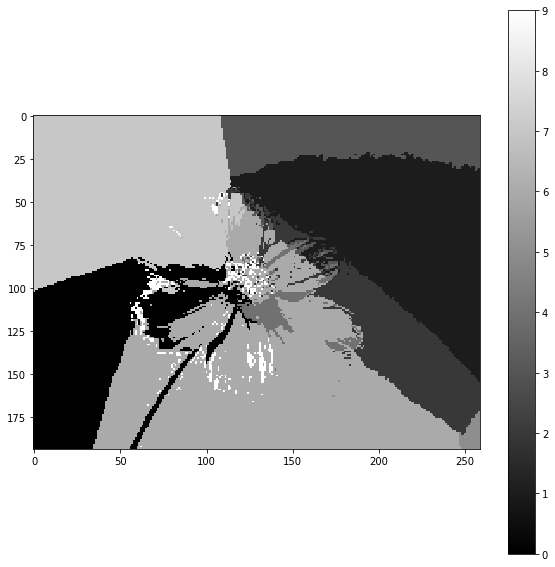

In [119]:
function("flower.jpeg","result.png",4,10,1,1)